In [26]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os



In [27]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Assuming images are in a folder with subfolders for each class (lightning, rain, snow)
src_dir = 'C:\\Users\\sanja\\Downloads\\Weather_CNN'
categories = ['lightning', 'rain', 'snow']

# Define target directories for training, validation, and test
train_dir = 'C:\\Users\\sanja\\Downloads\\Weather_CNN'
valid_dir = 'C:\\Users\\sanja\\Downloads\\Weather_CNN'
test_dir = 'C:\\Users\\sanja\\Downloads\\Weather_CNN'

# Split the data for each category
for category in categories:
    category_path = os.path.join(src_dir, category)
    images = os.listdir(category_path)
    
    # Split data into 70% training, 15% validation, and 15% test
    train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
    valid_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)
    
    # Move images to the corresponding directories
    for image in train_images:
        shutil.move(os.path.join(category_path, image), os.path.join(train_dir, category, image))
    
    for image in valid_images:
        shutil.move(os.path.join(category_path, image), os.path.join(valid_dir, category, image))
    
    for image in test_images:
        shutil.move(os.path.join(category_path, image), os.path.join(test_dir, category, image))


In [28]:
# Step 2: Data Preprocessing
image_size = (224, 224)  # VGG16 expects 224x224 images
batch_size = 32

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Random rotations
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shearing
    zoom_range=0.2,  # Zoom
    horizontal_flip=True,  # Flip images
    fill_mode='nearest')  # Fill any missing pixels after transformations

test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescaling for validation and test data

# Loading the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # Multi-class classification
)

validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 30 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


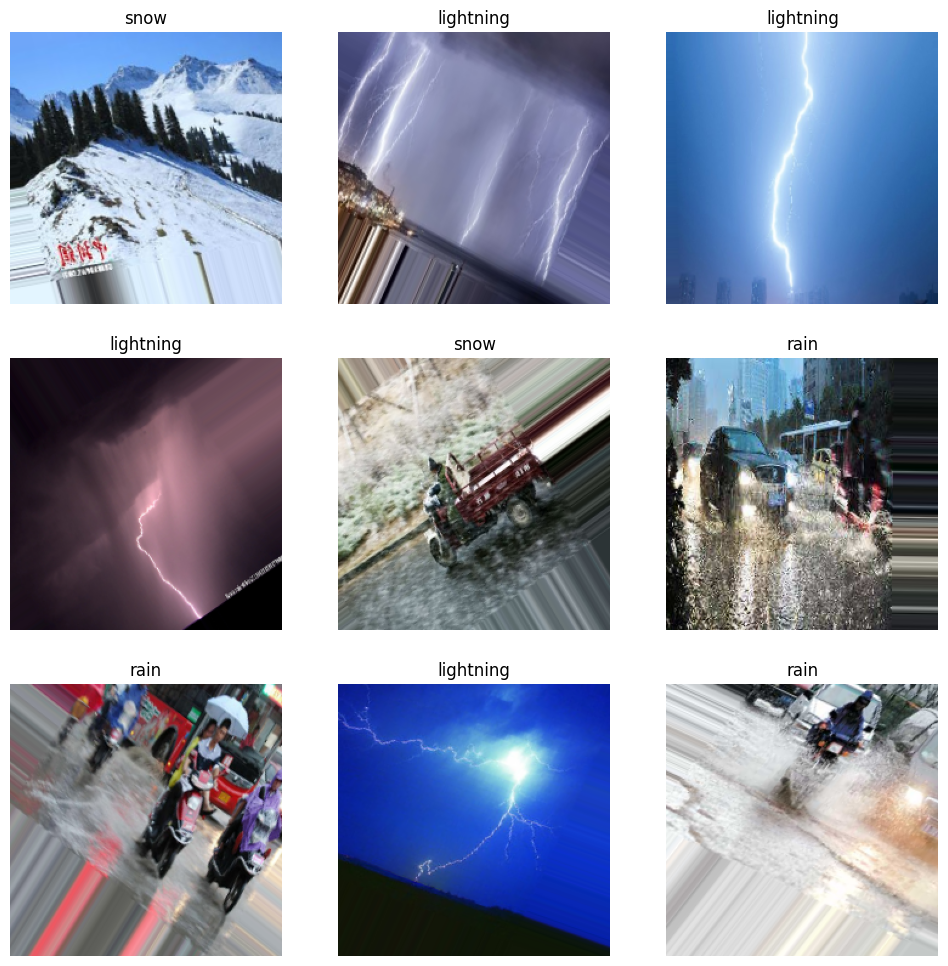

In [29]:
# Step 4: Data Visualization (EDA)
class_names = list(train_generator.class_indices.keys())

# Displaying sample images
sample_images, labels = next(train_generator)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(class_names[labels[i].argmax()])
    plt.axis('off')
plt.show()


In [30]:
# Step 5: Model Construction & Training

# Load pre-trained VGG16 model (excluding the top layer for transfer learning)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model so that they don't get updated during training
base_model.trainable = False

# Create the model
model = models.Sequential([
    base_model,  # Add the VGG16 base model
    layers.GlobalAveragePooling2D(),  # Global pooling to reduce the spatial dimensions
    layers.Dense(512, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(3, activation='softmax')  # Output layer (3 categories: lightning, rain, snow)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


c:\Users\sanja\Ankita Srivastava\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.3333 - loss: 1.4164 - val_accuracy: 0.4333 - val_loss: 1.0570
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.3667 - loss: 1.2153 - val_accuracy: 0.3000 - val_loss: 1.0207
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5333 - loss: 0.9838 - val_accuracy: 0.5333 - val_loss: 0.9667
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5000 - loss: 0.8695 - val_accuracy: 0.7333 - val_loss: 0.9042
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.4667 - loss: 0.9199 - val_accuracy: 0.8333 - val_loss: 0.8448
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.7000 - loss: 0.8273 - val_accuracy: 0.7667 - val_loss: 0.8028
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.7333 - loss: 0.8139 - val_accuracy: 0.7333 - val_loss: 0.7741
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.7667 - loss: 0.7524 - val_accuracy: 0.7333 - val_loss: 0.7505
Epoch 9/10
1/1

In [31]:
# Step 6: Model Evaluation
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7667 - loss: 0.6847
Test accuracy: 76.67%


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Classification Report:
              precision    recall  f1-score   support

   lightning       0.38      0.60      0.46        10
        rain       0.75      0.30      0.43        10
        snow       0.30      0.30      0.30        10

    accuracy                           0.40        30
   macro avg       0.48      0.40      0.40        30
weighted avg       0.47      0.40      0.40        30



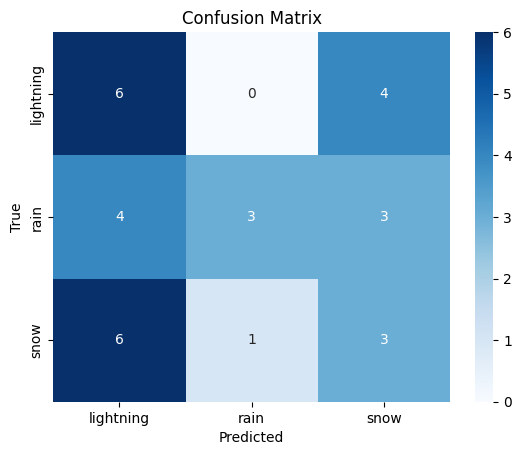

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions on the test set
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes

# Generate classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names))

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
